# 2. Density estimation

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 6)})

In [2]:
df = pd.read_csv("data/n90pol.csv")
print(df.shape)
df.head()

(90, 3)


,amygdala,acc,orientation
0,0.0051,-0.0286,2
1,-0.0674,0.0007,3
2,-0.0257,-0.0110,3
3,0.0504,-0.0167,2
4,0.0125,-0.0005,5


In [3]:
df['orient_cat'] = df.orientation.astype("category") 

<AxesSubplot:xlabel='amygdala', ylabel='acc'>

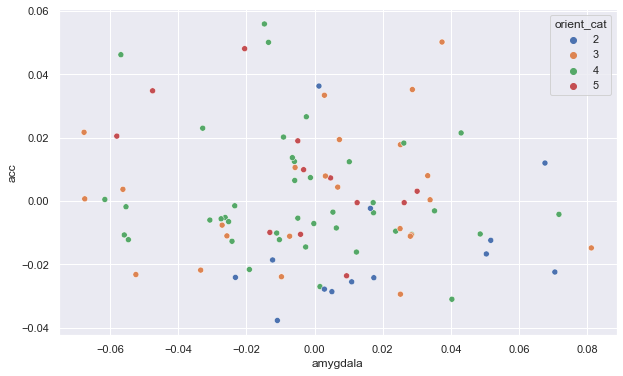

In [4]:
sns.scatterplot(data=df, x='amygdala', y='acc', hue='orient_cat')

## Plots (a)

In [5]:
amygdala_v, acc_v = (1.06 * df.drop('orientation', axis=1).std() * (df.shape[0] ** (-1/5))).values

/var/folders/3f/b2rkyt9d3dj6_4z7jyrzx88m0000gn/T/ipykernel_14338/1048008961.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  amygdala_v, acc_v = (1.06 * df.drop('orientation', axis=1).std() * (df.shape[0] ** (-1/5))).values


### Amygdala

<AxesSubplot:ylabel='Density'>

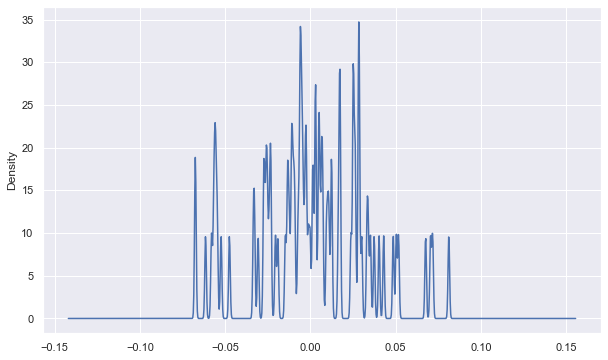

In [6]:
df.amygdala.plot.kde(bw_method=amygdala_v)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


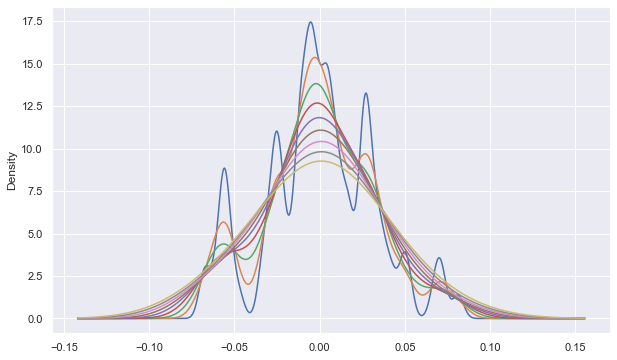

In [7]:
for i in np.linspace(0, 1., 11)[1:10]:
    print(df.amygdala.plot.kde(bw_method=i))

(-0.0676, 0.0812)

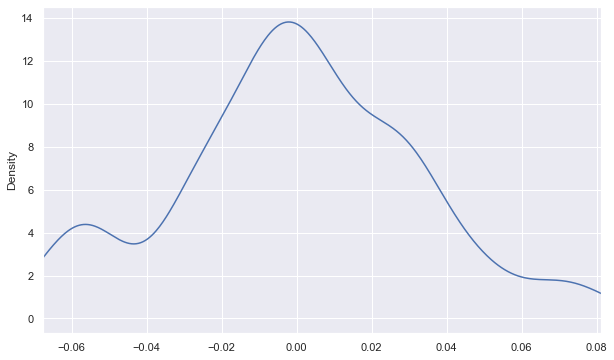

In [8]:
df.amygdala.plot.kde(bw_method=.3).set_xlim(df.amygdala.min(), df.amygdala.max())

<AxesSubplot:ylabel='Frequency'>

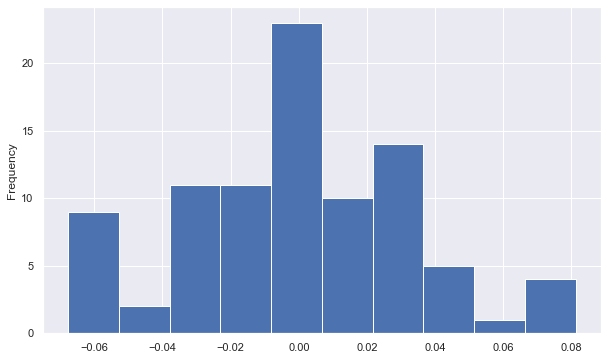

In [9]:
df.amygdala.plot.hist(bins=10)

### Acc

<AxesSubplot:ylabel='Frequency'>

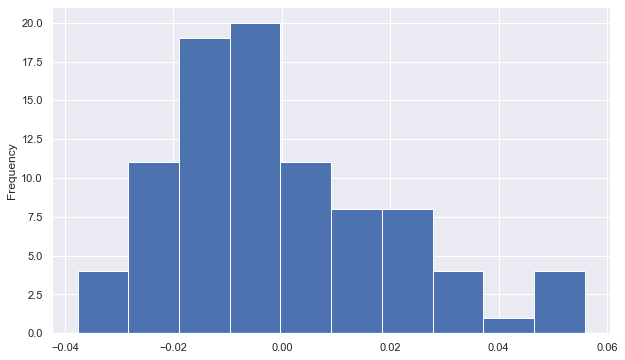

In [10]:
df.acc.plot.hist(bins=10)

<AxesSubplot:ylabel='Density'>

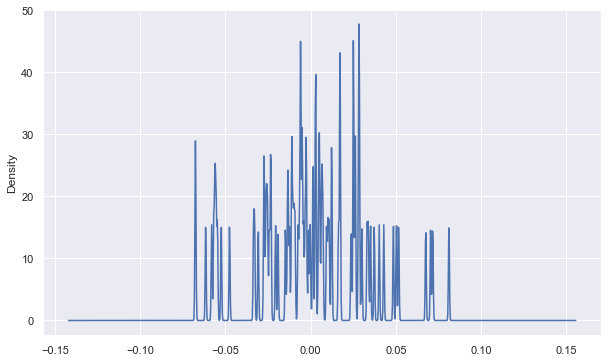

In [11]:
df.amygdala.plot.kde(bw_method=acc_v)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


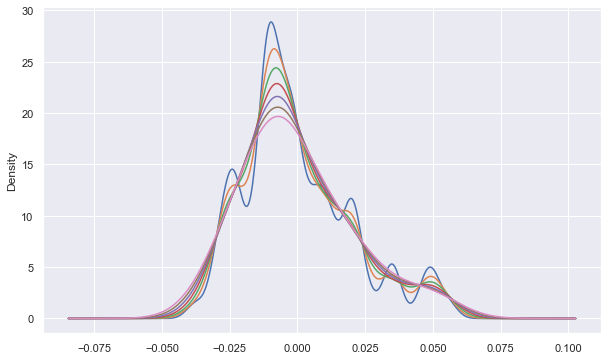

In [12]:
for i in np.linspace(0.1, .5, 8)[1:10]:
    print(df.acc.plot.kde(bw_method=i))

<AxesSubplot:ylabel='Density'>

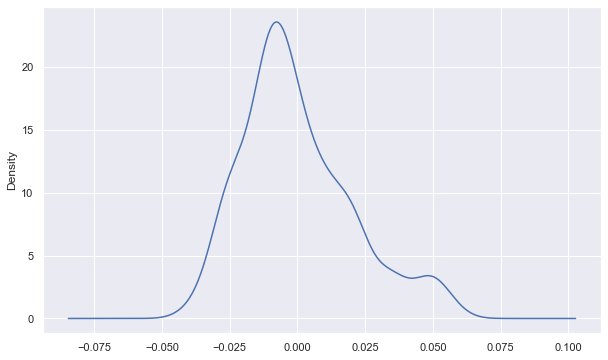

In [13]:
df.acc.plot.kde(bw_method=.3)#.set_xlim(df.acc.min(), df.acc.max())

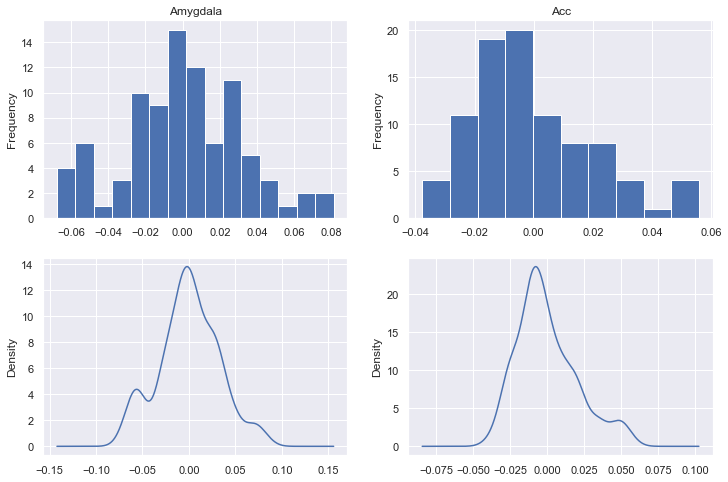

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

p1 = df.amygdala.plot.hist(bins=15, ax=axes[0][0])
p2 = df.acc.plot.hist(bins=10, ax=axes[0][1])
p3 = df.amygdala.plot.kde(bw_method=.3, ax=axes[1][0])#.set_xlim(df.amygdala.min(), df.amygdala.max())
p4 = df.acc.plot.kde(bw_method=.3, ax=axes[1][1])#.set_xlim(df.acc.min(), df.acc.max())

axes[0, 0].set_title("Amygdala")
axes[0, 1].set_title("Acc")
plt.savefig("img/plot_2_a.png")

## 2-D Histogram

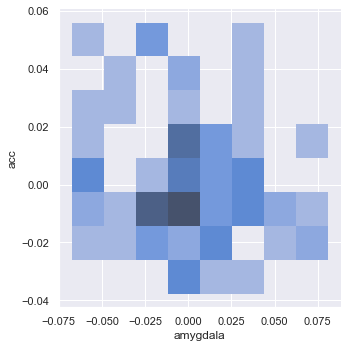

In [15]:
sns.displot(data = df, x='amygdala', y='acc', bins=8)
plt.savefig("img/plot_2_b.png")

---

# 2D KDE



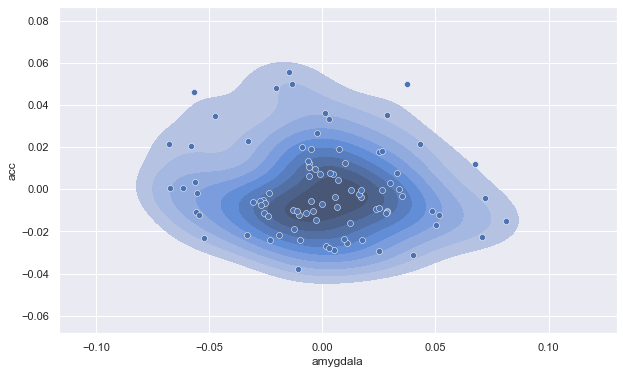

In [16]:
sns.kdeplot(data=df, x="amygdala", y="acc", fill=True, bw_method=0.5, thresh=0.1)
sns.scatterplot(data=df, x='amygdala', y='acc', color='b')
plt.savefig("img/plot_2_c.png")

---

# Conditional Distribution

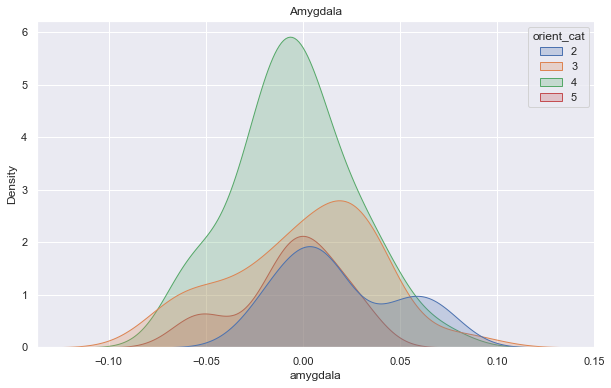

In [17]:
sns.kdeplot(data=df, x='amygdala', bw_method=.5, hue='orient_cat', shade=True).set(title='Amygdala')
plt.savefig('img/plot_2_d_1.png')

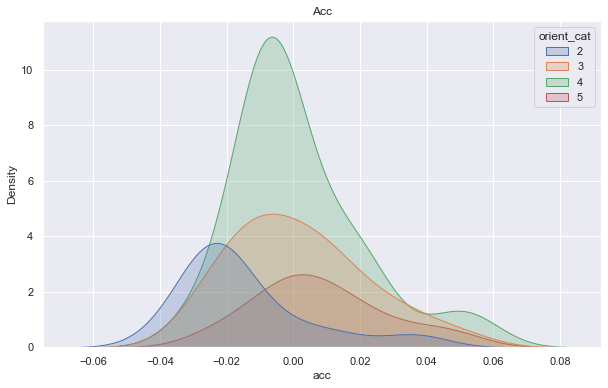

In [18]:
sns.kdeplot(data=df, x='acc', bw_method=.5, hue='orient_cat', shade=True).set(title='Acc')
plt.savefig('img/plot_2_d_2.png')

In [19]:
df.groupby('orientation')[['amygdala', 'acc']].mean().reset_index().to_markdown(index=False)

'|   orientation |    amygdala |         acc |\n|--------------:|------------:|------------:|\n|             2 |  0.0190615  | -0.0147692  |\n|             3 |  0.0005875  |  0.00167083 |\n|             4 | -0.00471951 |  0.00130976 |\n|             5 | -0.00569167 |  0.00814167 |'

---

## Joint Conditional Distribution

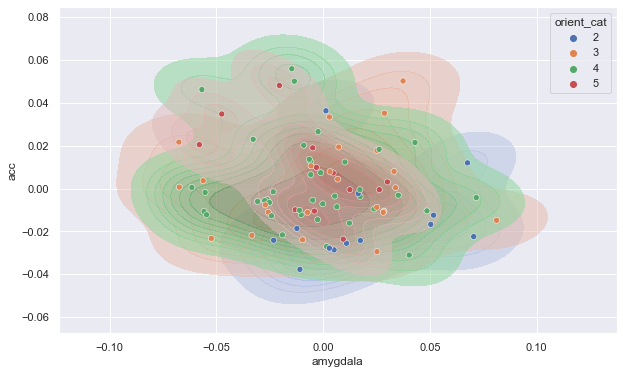

In [20]:
sns.kdeplot(data=df, x='amygdala', y='acc', hue='orient_cat', fill=True, alpha=0.5, bw_method=0.5)
sns.scatterplot(data=df, x='amygdala', y='acc', hue='orient_cat')
plt.savefig("img/plot_2_e.png")